In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
#Read data from csv file

df_csv = pd.read_csv('day.csv')

In [4]:
# Print top 5 recors
df_csv.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
#Check shape(rows and columns)
df_csv.shape

(730, 16)

In [6]:
#Check null values and types of columns

df_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.3+ KB


#### Remove instant and dteday from the dataset. Because there are the sequence numbes only not relation with dependent variable. Years and months are already in another independent variable.

In [7]:
df = df_csv.drop(['instant','dteday'], axis=1)

In [8]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [9]:
df.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### Visualise the data to check outliers, multicolinarity and corrolation. 
#### 'temp','atemp','hum','windspeed','casual','registered' are numerical variables other are categorical variable in the form of number. So we will drow a pairplot for numerical variables only. However pairplot can be drow for remaining variables because they have numbers. But we will use boxplot.


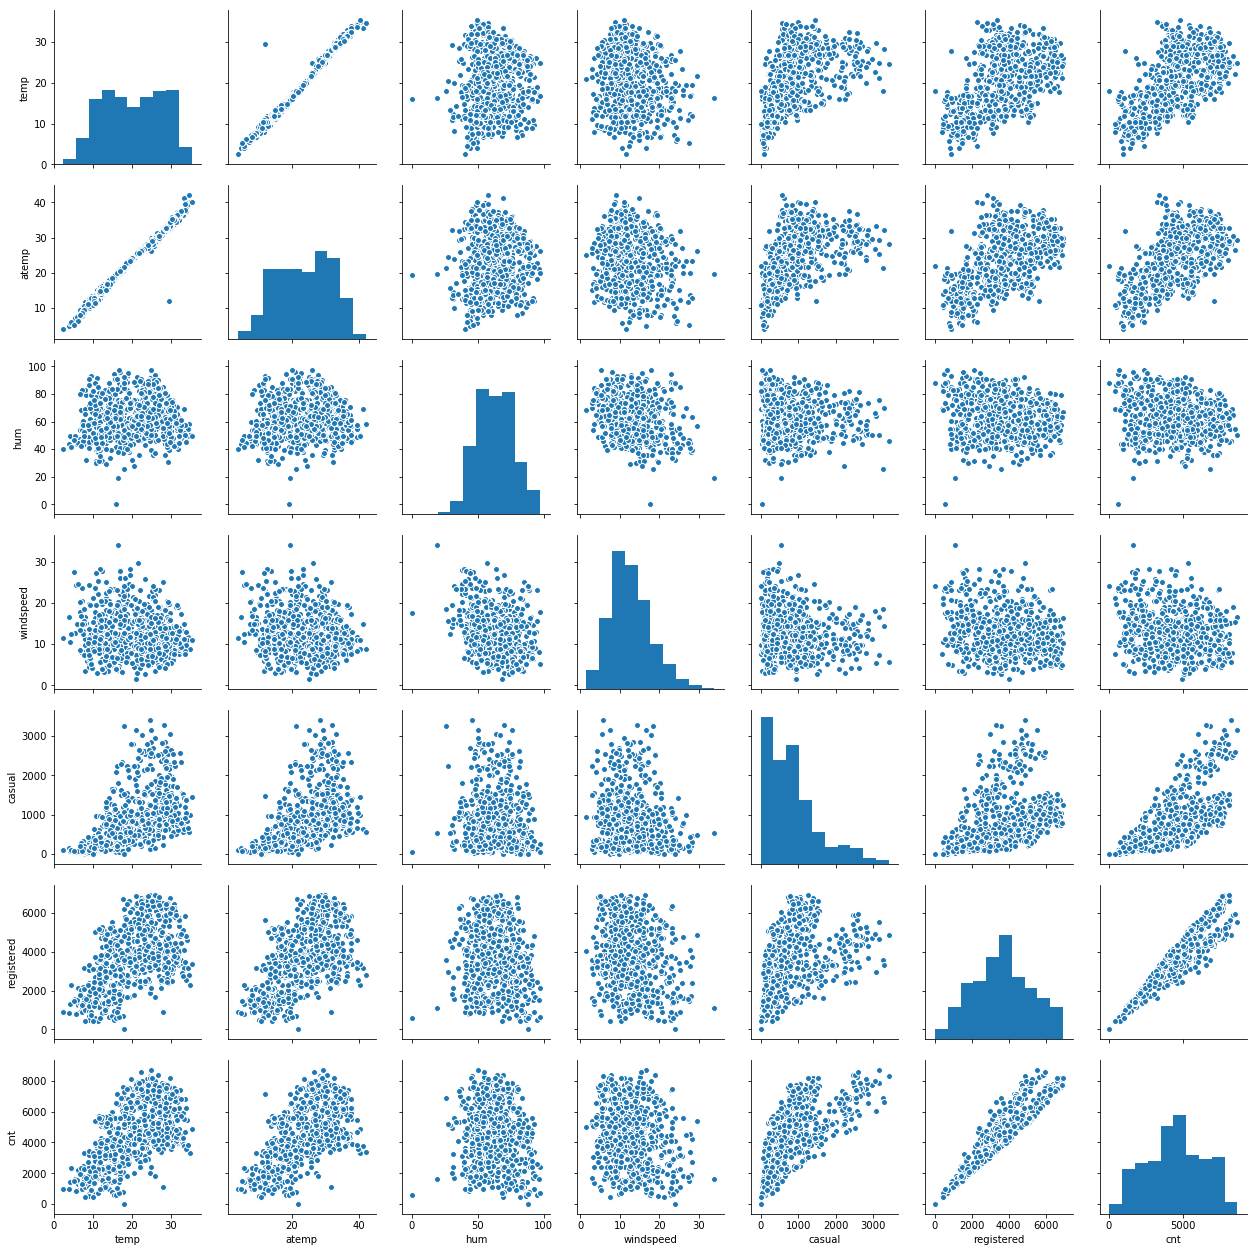

In [10]:
sns.pairplot(df[['temp','atemp','hum','windspeed','casual','registered','cnt']])
plt.show()

#### As we have seen above plots registerd and casual are nuch corrolated temp and atemp are less corrolated. But hum and windspeed are very less corrolated in pairplot

#### Let's drow box plot for categorical variables.

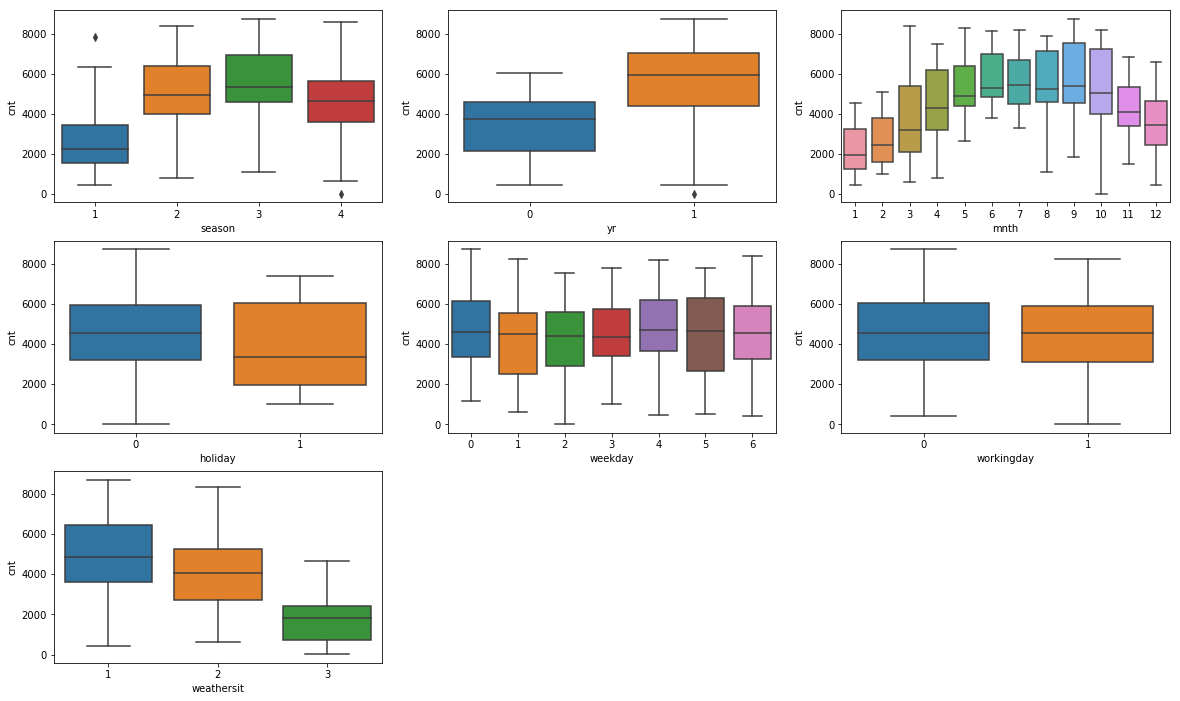

In [11]:
#season	yr	mnth	holiday	weekday	workingday	weathersit	

plt.figure(figsize=(20,12))
plt.subplot(3,3,1)
sns.boxplot(x='season', y='cnt', data=df)
plt.subplot(3,3,2)
sns.boxplot(x='yr', y='cnt', data=df)
plt.subplot(3,3,3)
sns.boxplot(x='mnth', y='cnt', data=df)
plt.subplot(3,3,4)
sns.boxplot(x='holiday', y='cnt', data=df)
plt.subplot(3,3,5)
sns.boxplot(x='weekday', y='cnt', data=df)
plt.subplot(3,3,6)
sns.boxplot(x='workingday', y='cnt', data=df)
plt.subplot(3,3,7)
sns.boxplot(x='weathersit', y='cnt', data=df)
plt.show()

#### As we have seen boxplot for categorical variables. It seems not muck outliers. Now check number of categories and convert them into one hot encoding if they have more then one category.

In [12]:
#Check number of categories for season variable. 
df['season'].value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [13]:
# It is a categorycal variable with limited category. So we can convert it to one hot encoding, and remove one from them.
season = pd.get_dummies(df['season'], drop_first=True,prefix='season')
df = pd.concat([df,season], axis=1)

In [14]:
df.drop('season', axis=1, inplace=True)
df.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_2,season_3,season_4
0,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985,0,0,0
1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801,0,0,0
2,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,0,0
3,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,0,0
4,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,0,0


In [15]:
# yr has only two categories 0 and 1 so no need to do any encoding.
df['yr'].value_counts()

1    365
0    365
Name: yr, dtype: int64

In [16]:
# Month is a continus variable. So no need to convert into dummies / one hot encoding
df['mnth'].value_counts()

12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64

In [17]:
# Holiday has two only categories. So no need to apply scaling
df['holiday'].value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [18]:
# It is again a sequantial variavle. So no need to apply one hot encoding
df['weekday'].value_counts()

2    105
1    105
6    104
5    104
4    104
3    104
0    104
Name: weekday, dtype: int64

In [19]:
# It has only two category. So no need to apply encoding
df['workingday'].value_counts()

1    504
0    226
Name: workingday, dtype: int64

In [20]:
# We can apply one hot encoding for it.
df['weathersit'].value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [21]:
season = pd.get_dummies(df['weathersit'], drop_first=True,prefix='weathersit')
df = pd.concat([df,season], axis=1)


In [22]:
df.drop('weathersit', axis=1, inplace=True)

In [23]:
df.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,season_2,season_3,season_4,weathersit_2,weathersit_3
0,0,1,0,1,1,14.110847,18.18125,80.5833,10.749882,331,654,985,0,0,0,1,0
1,0,1,0,2,1,14.902598,17.68695,69.6087,16.652113,131,670,801,0,0,0,1,0
2,0,1,0,3,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,0,0,0,0
3,0,1,0,4,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,0,0,0,0
4,0,1,0,5,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,0,0,0,0


#### Split data into training and testing datasets.

In [24]:

np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

#### Apply scaling technique to scale numerical variables.

In [25]:
scaler = MinMaxScaler()

In [26]:
numeric_variables = ['mnth','weekday','temp','atemp','hum','windspeed','casual','registered','cnt']

df[numeric_variables] = scaler.fit_transform(df[numeric_variables])

In [27]:
df.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,season_2,season_3,season_4,weathersit_2,weathersit_3
0,0,0.0,0,0.166667,1,0.355170,0.373517,0.828620,0.284606,0.096538,0.091539,0.110792,0,0,0,1,0
1,0,0.0,0,0.333333,1,0.379232,0.360541,0.715771,0.466215,0.037852,0.093849,0.089623,0,0,0,1,0
2,0,0.0,0,0.500000,1,0.171000,0.144830,0.449638,0.465740,0.034624,0.174560,0.152669,0,0,0,0,0
3,0,0.0,0,0.666667,1,0.175530,0.174649,0.607131,0.284297,0.031103,0.207046,0.177174,0,0,0,0,0
4,0,0.0,0,0.833333,1,0.209120,0.197158,0.449313,0.339143,0.023474,0.216286,0.181546,0,0,0,0,0


#### Check corrolation using heatmap

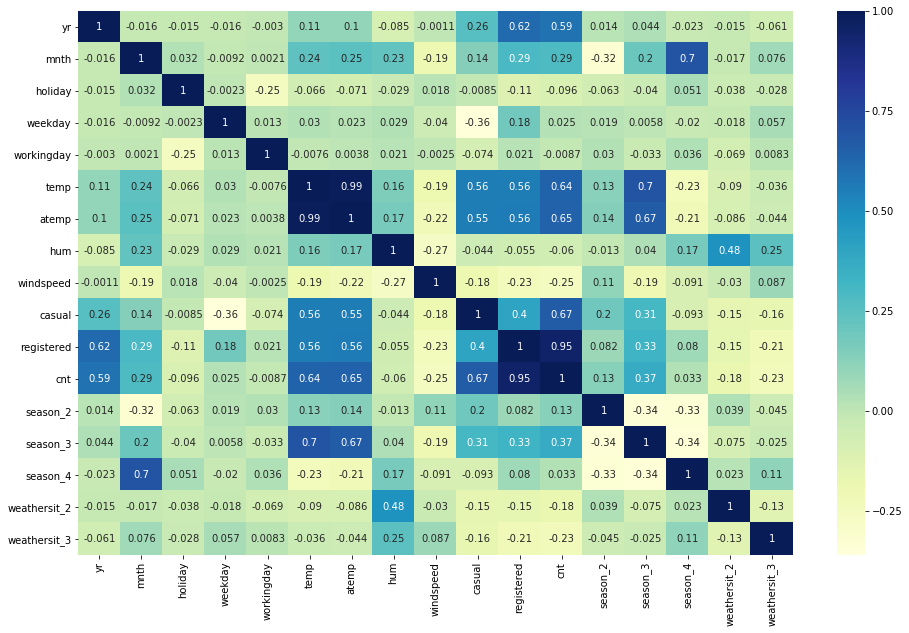

In [28]:
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

#### As per above headmap. We can easily cheak that cnt is highly corrolated with yr, mnth, temp, atemp, casual, registered, season. Few of them are negetive corrolated. So we can directly ignore negetive corrolated variables. 
#### We can check one by one corrolation using scaterplot for all more and less corrolated variables.

In [29]:
#### Divide data into x and y training sets

y_train = df_train.pop('cnt')
X_train = df_train

In [30]:
print(y_train.shape)
print(X_train.shape)

(510,)
(510, 16)


#### Apply recursive feature elimination to select best corrolated features. In this example, I am taking top 10 features for model training.

In [31]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 10)
rfe = rfe.fit(X_train, y_train)

In [32]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('mnth', False, 7),
 ('holiday', True, 1),
 ('weekday', False, 2),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', False, 5),
 ('windspeed', False, 6),
 ('casual', True, 1),
 ('registered', True, 1),
 ('season_2', True, 1),
 ('season_3', False, 3),
 ('season_4', True, 1),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [149]:
columns = X_train.columns[rfe.support_]
columns

Index(['yr', 'holiday', 'temp', 'atemp', 'casual', 'registered', 'season_2',
       'season_4', 'weathersit_2', 'weathersit_3'],
      dtype='object')

#### Using selected 10 columns, we will build a model using Linear regression od statesmodel

In [178]:
X_train_10 = X_train[columns]
X_train_10 = sm.add_constant(X_train_10)
model = sm.OLS(y_train,X_train_10).fit()

In [179]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.336e+31
Date:                Sun, 07 Mar 2021   Prob (F-statistic):               0.00
Time:                        01:02:03   Log-Likelihood:                 12992.
No. Observations:                 510   AIC:                        -2.596e+04
Df Residuals:                     499   BIC:                        -2.591e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.108e-12   3.54e-13     -3.133      0.002    -1.8e-12   -4.13e-13
yr            5.969e-13   2.92e-13      2.047      0.041    2.39e-14    1.17e-12
holiday         5.4e-13   6.07e-13      0.889      0.374   -6.53e-13    1.73e-12
temp          8.527e-14    9.1e-14      0.937      0.349   -9.35e-14    2.64e-13
atemp        -1.705e-13   8.23e-14     -2.073      0.039   -3.32e-13   -8.93e-15
casual           1.0000   1.84e-16   5.44e+15      0.000       1.000       1.000
registered       1.0000   1.19e-16   8.41e+15      0.000       1.000       1.000
season_2     -7.958e-13   2.42e-13     -3.282      0.001   -1.27e-12   -3.19e-13
season_4     -1.137e-13   2.72e-13     -0.418      0.676   -6.48e-13     4.2e-13
weathersit_2  3.908e-13   2.12e-13      1.845      0.066   -2.53e-14    8.07e-13
weathersit_3 -1.023e-12   6.28e-13     -1.630      0.104   -2.26e-12     2.1e-13
==============================================================================
Omnibus:                        4.372   Durbin-Watson:                   0.415
Prob(Omnibus):                  0.112   Jarque-Bera (JB):                4.224
Skew:                           0.220   Prob(JB):                        0.121
Kurtosis:                       3.073   Cond. No.                     2.91e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.91e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### As per above summary. Adjusted R-squared is 1 which is showing 100% accuracy. It may be overfitting. overfiting can be test with testing data. There are few variables with p-values greater than 0.05. So we can remove them. Because there is no advantage to keep irrelavent variables.

In [180]:
X_train_new = X_train_10.drop('const', axis=1, inplace=True)

In [184]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_10
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,atemp,413.87
2,temp,407.23
5,registered,25.22
0,yr,4.89
4,casual,4.40
7,season_4,2.00
8,weathersit_2,1.64
6,season_2,1.62
9,weathersit_3,1.30
1,holiday,1.05


In [185]:
# atemp has more VIF. So we can remove it and check again in summary.

X_train_10.drop('atemp', axis=1, inplace=True)
X_train_10 = sm.add_constant(X_train_10)
model = sm.OLS(y_train,X_train_10).fit()

In [186]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.902e+31
Date:                Sun, 07 Mar 2021   Prob (F-statistic):               0.00
Time:                        01:07:33   Log-Likelihood:                 12862.
No. Observations:                 510   AIC:                        -2.570e+04
Df Residuals:                     500   BIC:                        -2.566e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.194e-12   4.25e-13     -2.808      0.005   -2.03e-12   -3.59e-13
yr            2.061e-13   3.75e-13      0.549      0.583   -5.32e-13    9.44e-13
holiday      -2.387e-12   7.82e-13     -3.053      0.002   -3.92e-12   -8.51e-13
temp          1.492e-13    2.8e-14      5.325      0.000    9.42e-14    2.04e-13
casual           1.0000   2.37e-16   4.22e+15      0.000       1.000       1.000
registered       1.0000   1.53e-16   6.53e+15      0.000       1.000       1.000
season_2      7.958e-13    3.1e-13      2.565      0.011    1.86e-13    1.41e-12
season_4      1.023e-12   3.46e-13      2.954      0.003    3.43e-13     1.7e-12
weathersit_2    2.7e-13   2.73e-13      0.990      0.323   -2.66e-13    8.06e-13
weathersit_3          0   8.08e-13          0      1.000   -1.59e-12    1.59e-12
==============================================================================
Omnibus:                       43.849   Durbin-Watson:                   0.437
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.013
Skew:                           0.779   Prob(JB):                     3.08e-12
Kurtosis:                       3.258   Cond. No.                     2.90e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.9e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [187]:
X_train_10.drop('const', axis=1, inplace=True)

In [188]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_10
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,registered,25.06
2,temp,19.24
0,yr,4.89
3,casual,4.39
6,season_4,1.88
7,weathersit_2,1.62
5,season_2,1.57
8,weathersit_3,1.30
1,holiday,1.05


In [190]:
# registered has more VIF. So we can remove it and check again in summary.

X_train_10.drop('registered', axis=1, inplace=True)
X_train_10 = sm.add_constant(X_train_10)
model = sm.OLS(y_train,X_train_10).fit()

In [191]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     320.4
Date:                Sun, 07 Mar 2021   Prob (F-statistic):          1.49e-191
Time:                        01:09:45   Log-Likelihood:                -4125.5
No. Observations:                 510   AIC:                             8269.
Df Residuals:                     501   BIC:                             8307.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          329.5239    123.220      2.674      0.008      87.433     571.615
yr            1827.4854     73.131     24.989      0.000    1683.805    1971.166
holiday       -878.8052    224.927     -3.907      0.000   -1320.722    -436.888
temp           126.7856      5.903     21.478      0.000     115.188     138.384
casual           0.6851      0.068     10.120      0.000       0.552       0.818
season_2       408.7098     88.713      4.607      0.000     234.414     583.006
season_4      1060.0714     89.357     11.863      0.000     884.512    1235.631
weathersit_2  -504.7149     76.404     -6.606      0.000    -654.828    -354.602
weathersit_3 -2116.5391    216.051     -9.796      0.000   -2541.016   -1692.062
==============================================================================
Omnibus:                       64.878   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              119.755
Skew:                          -0.757   Prob(JB):                     9.90e-27
Kurtosis:                       4.828   Cond. No.                     6.94e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.94e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#Adjusted R-Squared had gone down after removing registered. 

In [192]:
# Calculate the VIFs for the new model

X_train_10.drop('const', axis=1, inplace=True)
vif = pd.DataFrame()
X = X_train_10
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.17
3,casual,4.18
0,yr,2.06
6,weathersit_2,1.51
4,season_2,1.49
5,season_4,1.36
7,weathersit_3,1.10
1,holiday,1.03


#We can remove temp as well. Because it also has VIF value more than 5

In [194]:
# registered has more VIF. So we can remove it and check again in summary.

X_train_10.drop('temp', axis=1, inplace=True)
X_train_10 = sm.add_constant(X_train_10)
model = sm.OLS(y_train,X_train_10).fit()

In [195]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     156.7
Date:                Sun, 07 Mar 2021   Prob (F-statistic):          6.47e-122
Time:                        01:14:21   Log-Likelihood:                -4291.9
No. Observations:                 510   AIC:                             8600.
Df Residuals:                     502   BIC:                             8634.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2378.3491    107.986     22.025      0.000    2166.189    2590.509
yr            1752.1731    101.135     17.325      0.000    1553.474    1950.872
holiday      -1192.2392    310.761     -3.837      0.000   -1802.792    -581.687
casual           1.4800      0.078     18.860      0.000       1.326       1.634
season_2       293.0196    122.599      2.390      0.017      52.149     533.890
season_4       613.9775    120.328      5.103      0.000     377.569     850.386
weathersit_2  -482.0667    105.774     -4.558      0.000    -689.881    -274.253
weathersit_3 -1709.9621    297.977     -5.739      0.000   -2295.398   -1124.527
==============================================================================
Omnibus:                       12.034   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.002   Jarque-Bera (JB):                9.016
Skew:                          -0.220   Prob(JB):                       0.0110
Kurtosis:                       2.520   Cond. No.                     6.93e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.93e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [196]:
# After removing all greater than 5 VIF values. It looks like perfect. There is no p-value more than 0.05